بارگذاری داده تمیز

In [3]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns

# project_root = one level up from current working directory
project_root = Path.cwd().parent  # expected: C:\Users\MeTa\Desktop\my_project

# relative paths
p = project_root / "data" / "processed" / "v2"
fig_dir = project_root / "reports" / "figures"
fig_dir.mkdir(parents=True, exist_ok=True)

# load once
df_match = pd.read_parquet(p / "match_clean_v2.parquet")
df_power = pd.read_parquet(p / "power_clean_v2.parquet")

print("project_root:", project_root)
print("match file:", p / "match_clean_v2.parquet")
print("shape:", df_match.shape)
print(df_match[["match_id", "tournament_name", "duration_total"]].head())


project_root: c:\Users\mit\Desktop\Finaaal
match file: c:\Users\mit\Desktop\Finaaal\data\processed\v2\match_clean_v2.parquet
shape: (16873, 64)
   match_id tournament_name  duration_total
0  11974049      Qualifiers             0.0
1  11974052      Qualifiers             0.0
2  11974053      Qualifiers             0.0
3  11974065      Qualifiers             0.0
4  11974066      Qualifiers             0.0


groupby و محاسبه میانگین

In [4]:
tournament_durations = (
    df_match.groupby("tournament_name")["duration_total"]
    .mean()
    .reset_index()
    .rename(columns={"duration_total":"avg_duration_minutes"})
    .sort_values("avg_duration_minutes", ascending=False)
)

print("Top 10 tournaments by average match duration:")
print(tournament_durations.head(10))


Top 10 tournaments by average match duration:
                                    tournament_name  avg_duration_minutes
229             Maceio, Singles Main, M-ITF-BRA-04A            212.687500
65               Balma, Singles Main, M-ITF-FRA-04A            193.000000
129   Feira de Santana, Singles Main, M-ITF-BRA-01A            185.531250
73                     Bogota, Colombia, Qualifying             71.944444
401                                 Santiago, Chile             71.666667
334  Oberhaching, Singles Qualifying, M-ITF-GER-03A             62.414634
297            Morelia, Singles Main, W-ITF-MEX-02A             60.875000
243                              Marrakech, Morocco             20.000000
112                         Dallas, USA, Qualifying             18.333333
380                          Rotterdam, Netherlands             17.193548


نمایش نتایج

In [5]:
longest_avg = tournament_durations.iloc[0]

print("the tounoment with the most avg time:")
print("Tournament:", longest_avg["tournament_name"])
print("Average duration (minutes):", round(longest_avg["avg_duration_minutes"], 2))
print(f"Average duration (hours:minutes): {int(longest_avg['avg_duration_minutes']//60)}h {int(longest_avg['avg_duration_minutes']%60)}m")


the tounoment with the most avg time:
Tournament: Maceio, Singles Main, M-ITF-BRA-04A
Average duration (minutes): 212.69
Average duration (hours:minutes): 3h 32m


نمودار

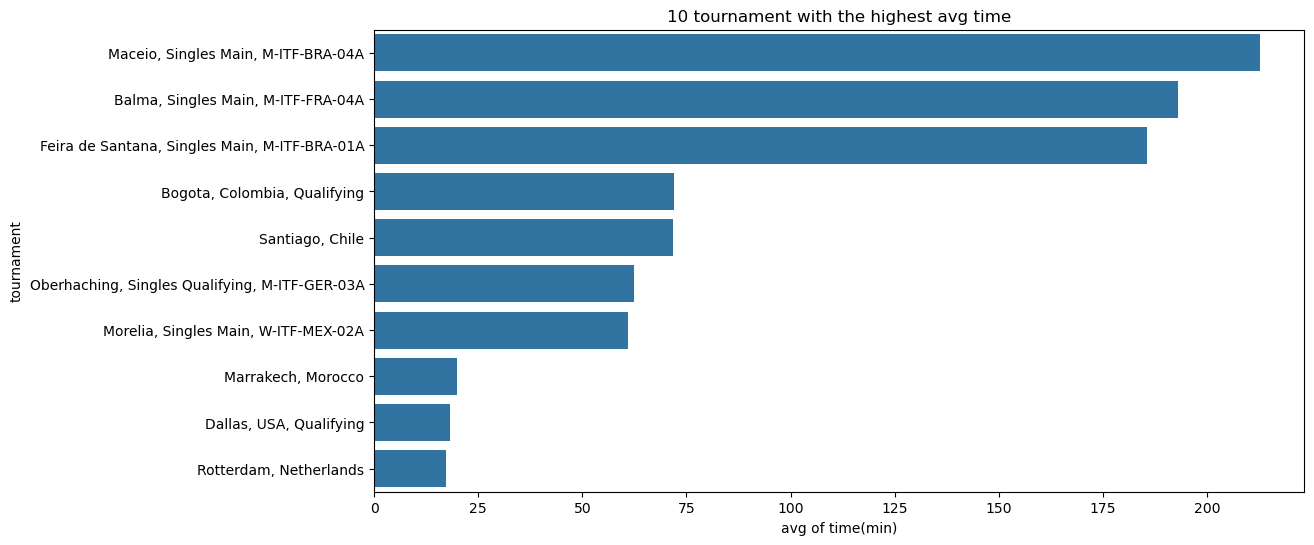

In [7]:
avg_duration = (
    df_match.groupby("tournament_name")["duration_total"]
    .mean()
    .reset_index()
    .sort_values("duration_total", ascending=False)
    .head(10)
)

plt.figure(figsize=(12,6))
sns.barplot(data=avg_duration, x="duration_total", y="tournament_name")
plt.xlabel("avg of time(min)")
plt.ylabel("tournament")
plt.title("10 tournament with the highest avg time")
plt.savefig(fig_dir / "q11_avg_duration_tournaments.png", dpi=300, bbox_inches="tight")
plt.show()
plt.close()


ذخیره نتیجه

In [5]:
out_dir = Path(r"C:\Users\MeTa\Desktop\my_project\reports\answers")
out_dir.mkdir(parents=True, exist_ok=True)

tournament_durations.to_csv(out_dir / "q11_tournament_avg_duration.csv", index=False, encoding="utf-8-sig")
print("Saved to reports/answers/q11_tournament_avg_duration.csv")


Saved to reports/answers/q11_tournament_avg_duration.csv
